<h1 style="color: #0b5345;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color:  #0b5345;">Instructions:</h2>

- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: #138d75;">Libraries</h1>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates


%matplotlib inline 
pd.set_option('display.max_columns', None)

Matplotlib is building the font cache; this may take a moment.


<h1 style="color: #138d75;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h2 style="color: #138d75;">Data loading</h2>

In [8]:
df_price = pd.read_csv("asset_price_data.csv")
df_weight = pd.read_csv("portfolio_weights.csv")

In [9]:
df_price.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [10]:
df_price.dtypes

date       object
Asset1    float64
Asset2    float64
Asset3    float64
Asset4    float64
Asset5    float64
dtype: object

In [11]:
df_price.fillna(0)



,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,0.00,70.11
779,2021-12-28,249.9368,104.526,39.115000,0.00,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [12]:
df_price["date"] = pd.to_datetime(df_price["date"])

In [13]:
df_price.set_index("date", inplace=True)


In [14]:
df_price

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,231.5061,55.875,25.649222,302.93,50.89
2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2019-01-04,230.4026,56.129,26.147133,301.77,51.38
2019-01-07,230.0543,56.838,25.955277,302.33,52.14
2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...
2021-12-27,249.9207,103.956,38.820000,NaN,70.11
2021-12-28,249.9368,104.526,39.115000,NaN,70.03
2021-12-29,248.7215,104.360,38.855000,342.46,69.81


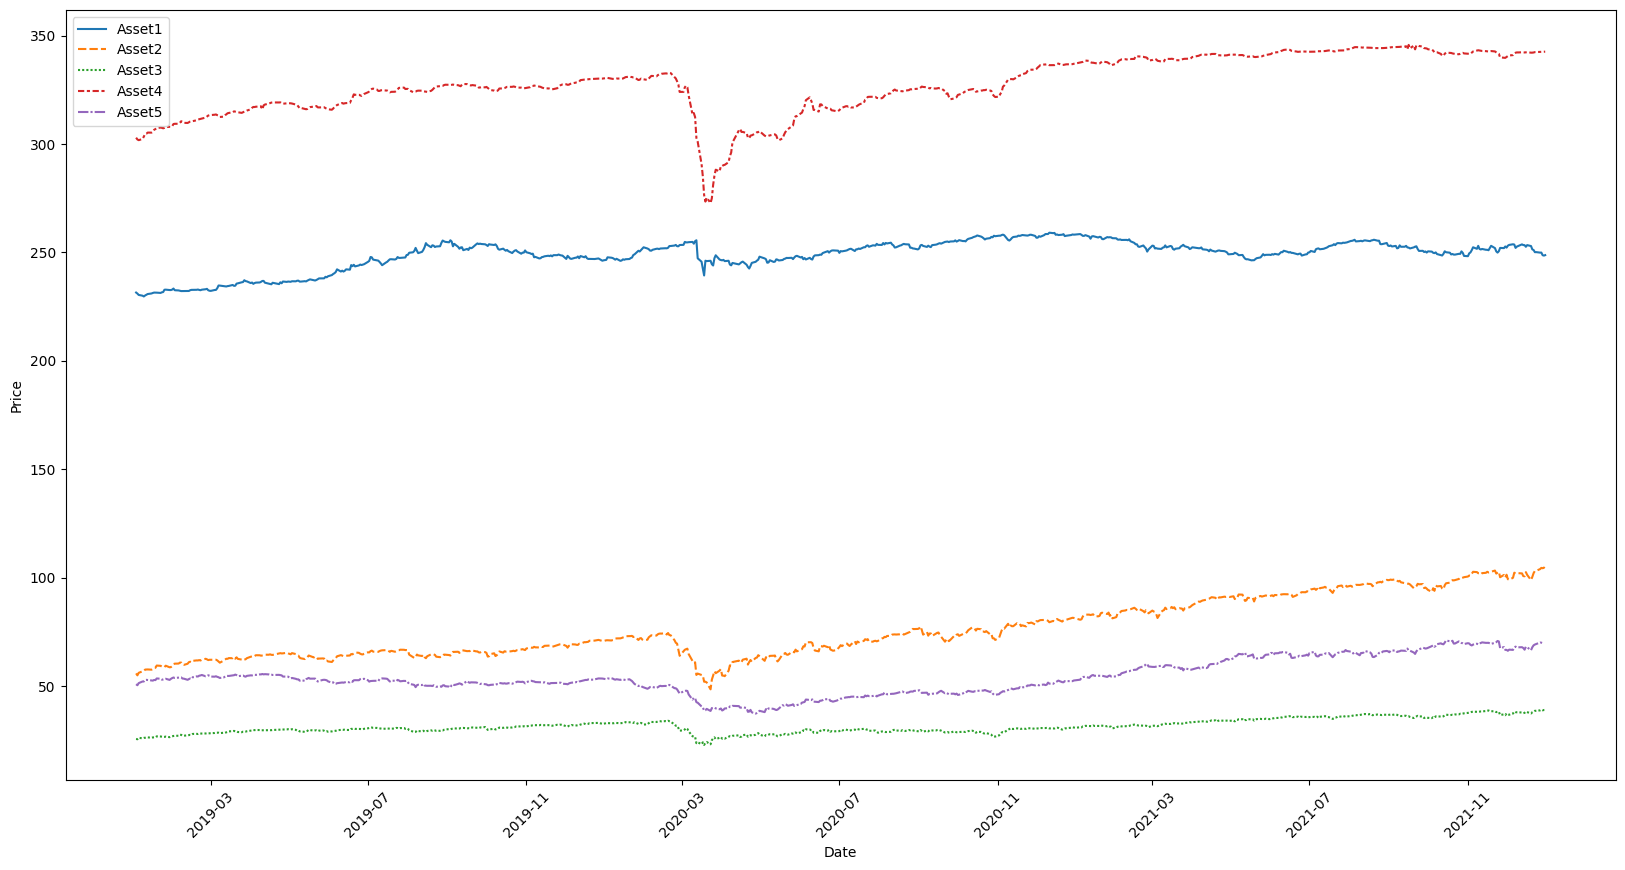

In [117]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df_price)

plt.xlabel("Date")
plt.ylabel("Price")


ax = plt.gca()
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

##### Looking at this graph, we can see that there's a tendency of low pricees between __January '20__ to __May '20__ in all the assets. This clearly can be affected due the global pandemic situation we have during these months. Also, __Asset 2 and 5__ started from a really close price and during all the time groth almost at the same time until 2020, which both prices started to separate, leaving __Asset 2__ scalate. __Asset 1 and 5__ looks more stable during the time on their initial prices  

<h1 style="color: #138d75;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #138d75;">Daily Returns Calculation.</h2>


In [19]:
df_returns = df_price.pct_change(fill_method=None).dropna()


<h2 style="color: #138d75;">Correlation Matrix Calculation.</h2>


In [21]:
correlation = df_returns.corr()

In [22]:
correlation

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,-0.082834,-0.061062,0.114129,-0.109410
Asset2,-0.082834,1.000000,0.852635,0.538620,0.599928
Asset3,-0.061062,0.852635,1.000000,0.523214,0.561887
Asset4,0.114129,0.538620,0.523214,1.000000,0.438086
Asset5,-0.109410,0.599928,0.561887,0.438086,1.000000


#### To visualize this better, we're going to usea a heatmap and see how many correlations we can analyze further:

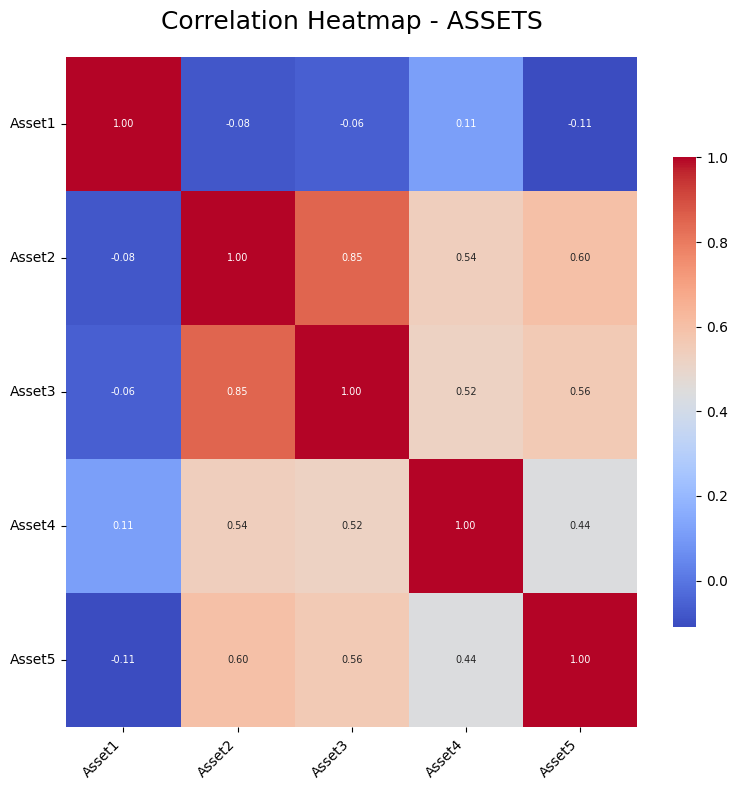

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
correlation_matrix = correlation

sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm", 
    fmt=".2f", 
    annot_kws={"size": 7}, 
    cbar_kws={"shrink": 0.7},  
    clip_on=False
)

plt.title("Correlation Heatmap - ASSETS", fontsize=18, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


#### According to this correlation matrix we can observe that most of the Assets has __a number close to 0__ but there's a few assets that we can analyze their relationship. We can se clearly that exist a strong correlation between the __Asset 2 and Asset 3, with the result of 0.85__. Taking this in consideration, we can analyze this better on the next plot: 

<h2 style="color: #138d75;">Scatter Plot between the Returns of Two Assets.</h2>


Text(0.5, 1.0, 'Scatter Plot: Asset2 vs Asset3 Daily Returns')

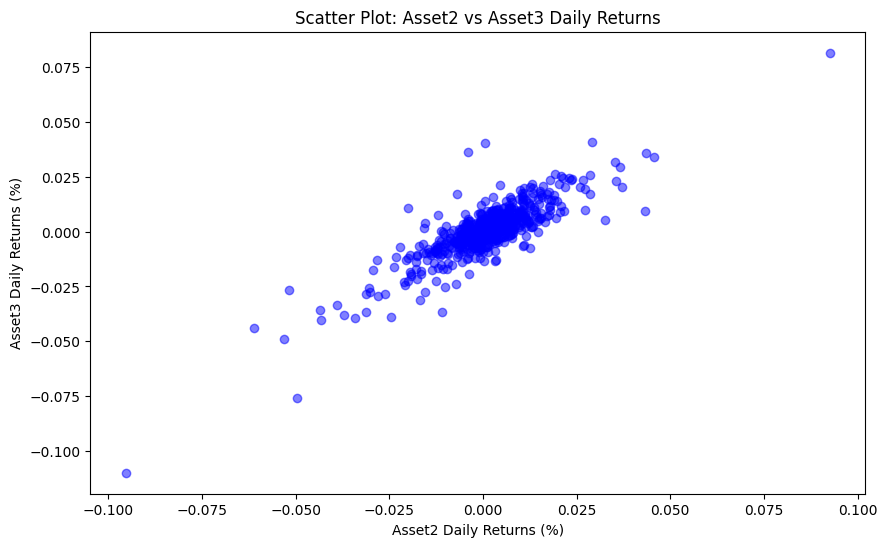

In [161]:
asset2_df = df_returns['Asset2']
asset3_df = df_returns['Asset3']

plt.figure(figsize=(10, 6))
plt.scatter(asset2_df, asset3_df, c='blue', alpha=0.5)


plt.xlabel('Asset2 Daily Returns (%)')
plt.ylabel('Asset3 Daily Returns (%)')
plt.title('Scatter Plot: Asset2 vs Asset3 Daily Returns')

#### We can observe that this relationship is linear and monotonic, the variables are moving in the same direction and the spread is moderate. This means that __when the return of Asset 3 is increase, Asset 2 increase too. 

#### Other number that we can observe is 0.599928 between __Asset2 and Asset5__, in comparation with the last correlation, this relationship is not strong and tends to be more moderate. We can analyze it better through the next plot: 	

Text(0.5, 1.0, 'Scatter Plot: Asset2 vs Asset5 Daily Returns')

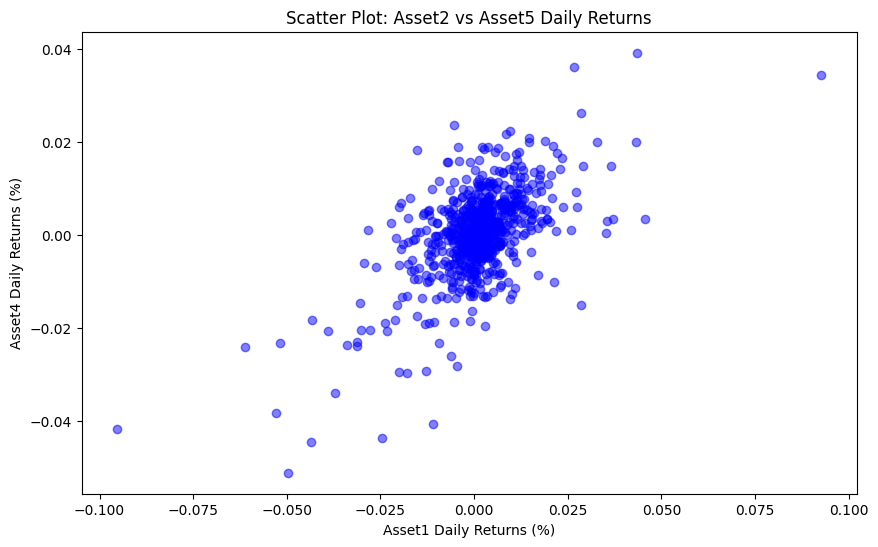

In [30]:
asset2_df = df_returns['Asset2']
asset5_df = df_returns['Asset5']

plt.figure(figsize=(10, 6))
plt.scatter(asset2_df, asset5_df, c='blue', alpha=0.5)

plt.xlabel('Asset1 Daily Returns (%)')
plt.ylabel('Asset4 Daily Returns (%)')
plt.title('Scatter Plot: Asset2 vs Asset5 Daily Returns')

#### In this graphic we can understand better this relationship. We can observe that this correlation is linear but is not completly monotonic. We can see that the spread in this case is focus in % close to 0, what we understand from this is that these 2 assets are not used to have extreme changes or deviations. 

#### To compare this analysis, we can also work with the lowest correlation value of our matrix. As we can see, the lower values are located in Asset 1 correlations, in this case, we can see on a graphic __Asset 1 and Asset 2__:

Text(0.5, 1.0, 'Scatter Plot: Asset1 vs Asset2 Daily Returns')

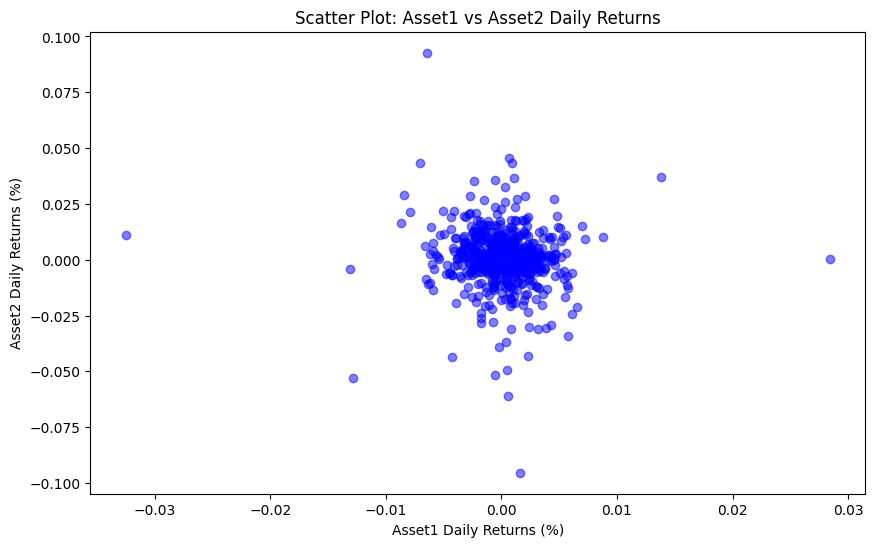

In [33]:
asset1_df = df_returns['Asset1']
asset2_df = df_returns['Asset2']

plt.figure(figsize=(10, 6))
plt.scatter(asset1_df, asset2_df, c='blue', alpha=0.5)

plt.xlabel('Asset1 Daily Returns (%)')
plt.ylabel('Asset2 Daily Returns (%)')
plt.title('Scatter Plot: Asset1 vs Asset2 Daily Returns')

#### The correlation is close to 0, meaning there is no linear relationship between __Asset1 and Asset2__. 


<h1 style="color: #138d75;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #138d75;">Loading the data.</h2>


In [279]:
df_weight.head()

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [281]:
df_weight.fillna(0)

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...
2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356


In [39]:
df_weight["date"] = pd.to_datetime(df_weight["date"])

In [40]:
df_weight.set_index("date", inplace=True)


<h2 style="color: #138d75;">Area Chart of Asset Weights.</h2>


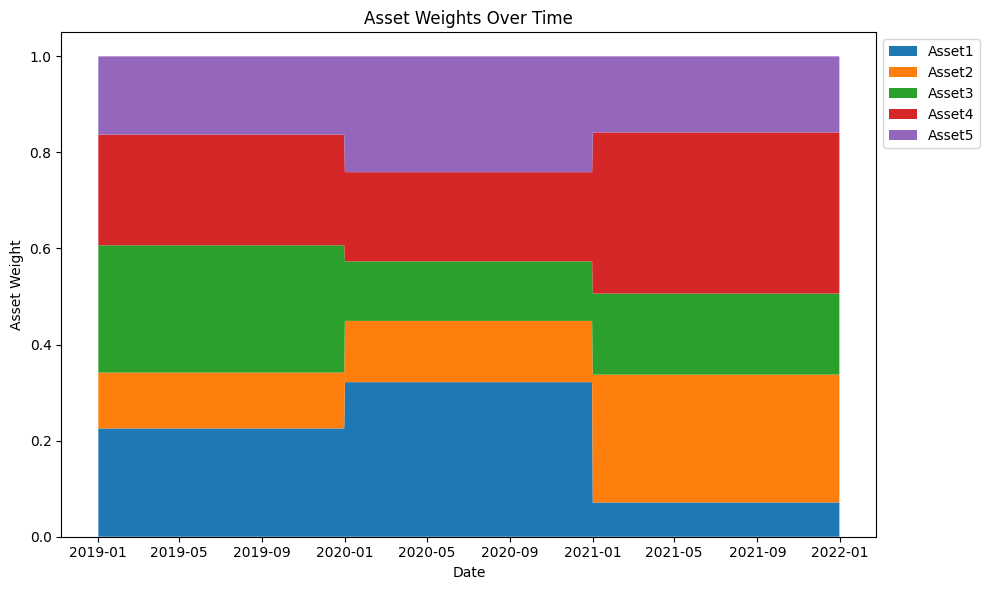

In [42]:
plt.figure(figsize=(10, 6)) 
plt.stackplot(df_weight.index, 
              df_weight.values.T,  
              labels=df_weight.columns)  


plt.xlabel('Date')  
plt.ylabel('Asset Weight')  
plt.title('Asset Weights Over Time') 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 


plt.tight_layout()

plt.show()

<h2 style="color: #138d75;">Chart of Historical Cumulative Returns of the Portfolio.</h2>


In [172]:
portfolio_returns = (df_returns * df_weight).sum(axis=1)

In [174]:
cumulative_returns = (1 + portfolio_returns).cumprod()


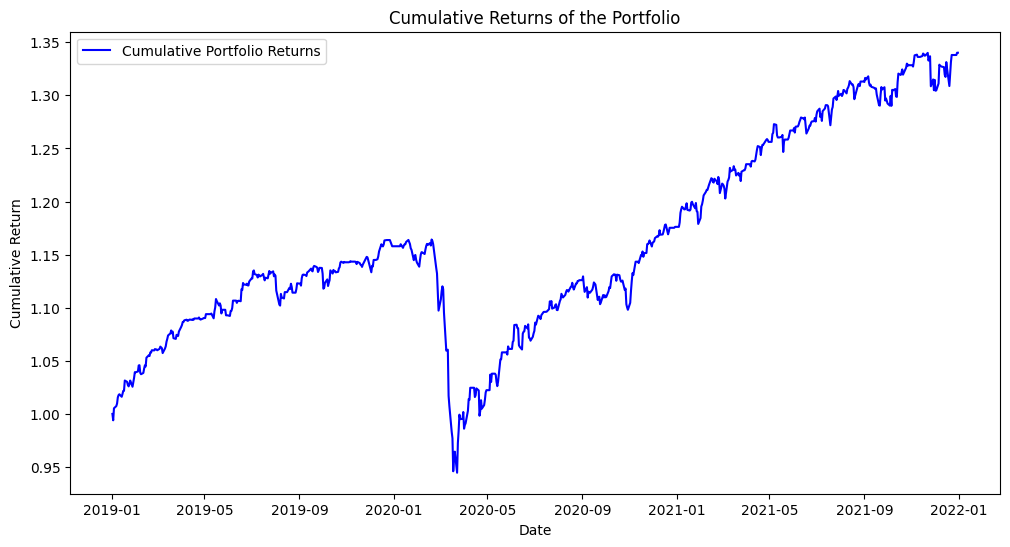

In [176]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='Cumulative Portfolio Returns', color='b')
plt.title("Cumulative Returns of the Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

<h2 style="color: #138d75;">Annualized Return.</h2>

In [178]:
total_return = cumulative_returns[-1] - 1


/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_51506/385764916.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = cumulative_returns[-1] - 1


In [182]:
years = len(df_weight) / 261


In [184]:
# Calculate annualized return
annualized_return = (1 + total_return) ** (1 / years) - 1

In [186]:
print(f"Annualized Return: {annualized_return:.4f}")

Annualized Return: 0.1025


<h2 style="color: #138d75;">Annualized Volatility.</h2>


In [188]:
daily_volatility = portfolio_returns.std()


In [190]:
annualized_volatility = daily_volatility * (261 ** 0.5)

print(f"Annualized Volatility: {annualized_volatility:.4f}")

Annualized Volatility: 0.0830


<h2 style="color: #138d75;">Area Chart of Asset Weights Grouped by Family.</h2>


In [194]:
asset_info = pd.read_csv('asset_information_data.csv')

In [204]:
portfolio_weights_category

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...
2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356


In [206]:
asset_info

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [208]:
asset_info = asset_info.set_index('Name')['Family']


In [210]:
portfolio_weights_category = df_weight.copy()


In [218]:
asset_info

Name
Asset1    Fixed Income
Asset2    Fixed Income
Asset3          Equity
Asset4          Equity
Asset5     Alternative
Name: Family, dtype: object

In [248]:
# Rename the columns of portfolio_weights
portfolio_weights = df_weight.rename(columns={
    'Asset1': 'Fixed Income',
    'Asset2': 'Fixed Income',
    'Asset3': 'Equity',
    'Asset4': 'Equity',
    'Asset5': 'Alternative'
})

print(portfolio_weights.head())



            Fixed Income  Fixed Income    Equity   Equity  Alternative
date                                                                  
2019-01-02      0.225458      0.116255  0.265003  0.23031     0.162974
2019-01-03      0.225458      0.116255  0.265003  0.23031     0.162974
2019-01-04      0.225458      0.116255  0.265003  0.23031     0.162974
2019-01-07      0.225458      0.116255  0.265003  0.23031     0.162974
2019-01-08      0.225458      0.116255  0.265003  0.23031     0.162974


In [252]:
category_weights = portfolio_weights.groupby(axis=1, level=0).sum()


/var/folders/zs/_d7261fd7s7690r1zflbt_6h0000gn/T/ipykernel_51506/161883920.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  category_weights = portfolio_weights.groupby(axis=1, level=0).sum()


<Figure size 1200x600 with 0 Axes>

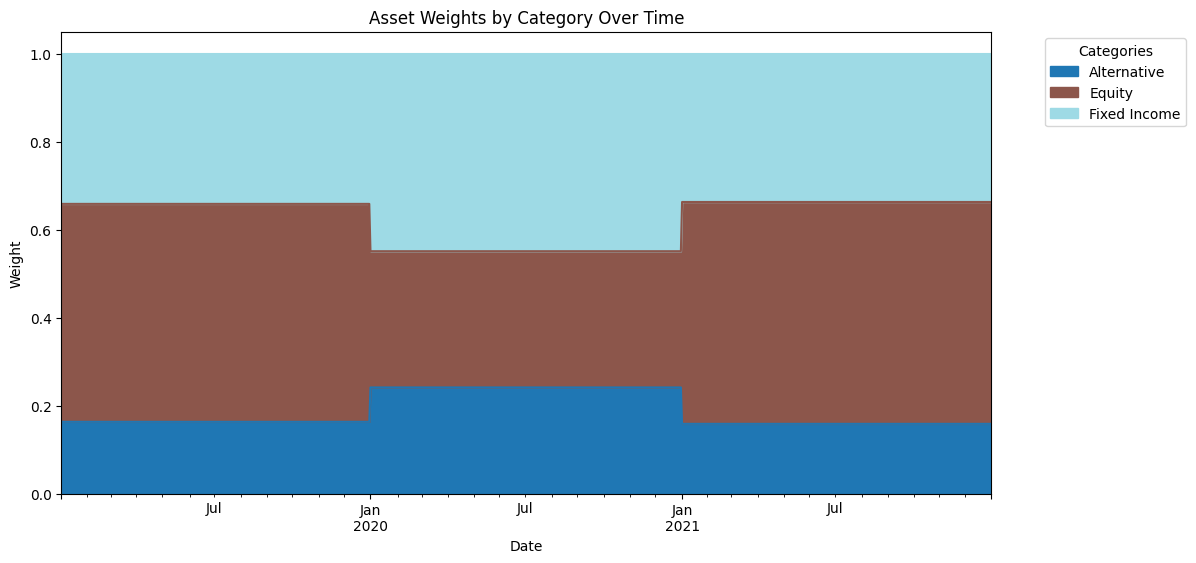

In [254]:
plt.figure(figsize=(12, 6))
category_weights.plot.area(stacked=True, figsize=(12, 6), cmap="tab20")
plt.title("Asset Weights by Category Over Time")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()